# Exploratory Analylsis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##  Import clean dataset

In [2]:
bank_df = pd.read_csv("../data/processed/bank_clean.csv")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_year
0,38.0,housemaid,MARRIED,basic.4y,0.0,False,False,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,2019
1,57.0,services,MARRIED,high.school,unknown,False,False,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.626521,5191,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,2016
2,37.0,services,MARRIED,high.school,0.0,True,False,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2019
3,40.0,admin.,MARRIED,basic.6y,0.0,False,False,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.625715,5191,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,2015
4,56.0,services,MARRIED,high.school,0.0,False,True,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.581983,5191,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2017


In [3]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_',
       'contact_year'],
      dtype='object')

### Target feature 
    - y

In [4]:
bank_df["y"].value_counts()

y
no     37941
yes     4811
Name: count, dtype: int64

In [5]:
bank_df["y"].value_counts(normalize=True)

y
no     0.887467
yes    0.112533
Name: proportion, dtype: float64

The target variable is highly imbalanced. Approximately 88% of clients did not subscribe to the product, while only around 11% converted.
This indicates that the marketing campaign has a relatively low success rate.

# Sociodempgraphic variables analysis

### conversion rate by job

In [6]:
job_conversion_rate = bank_df.groupby("job")["y"].value_counts(normalize=True).reset_index()
job_conversion_rate = job_conversion_rate[job_conversion_rate["y"]=='yes'].sort_values(by="proportion", ascending=False)
job_conversion_rate

,job,y,proportion
17,student,yes,0.313616
11,retired,yes,0.252525
21,unemployed,yes,0.144476
1,admin.,yes,0.129791
23,unknown,yes,0.113372
9,management,yes,0.111331
13,self-employed,yes,0.108564
19,technician,yes,0.108391
7,housemaid,yes,0.099373
5,entrepreneur,yes,0.082174


In [7]:
bank_df["job"].value_counts(normalize=True).reset_index()

,job,proportion
0,admin.,0.252667
1,blue-collar,0.224668
2,technician,0.163361
3,services,0.096721
4,management,0.071014
5,retired,0.041682
6,entrepreneur,0.035297
7,self-employed,0.034688
8,housemaid,0.026127
9,unemployed,0.024771


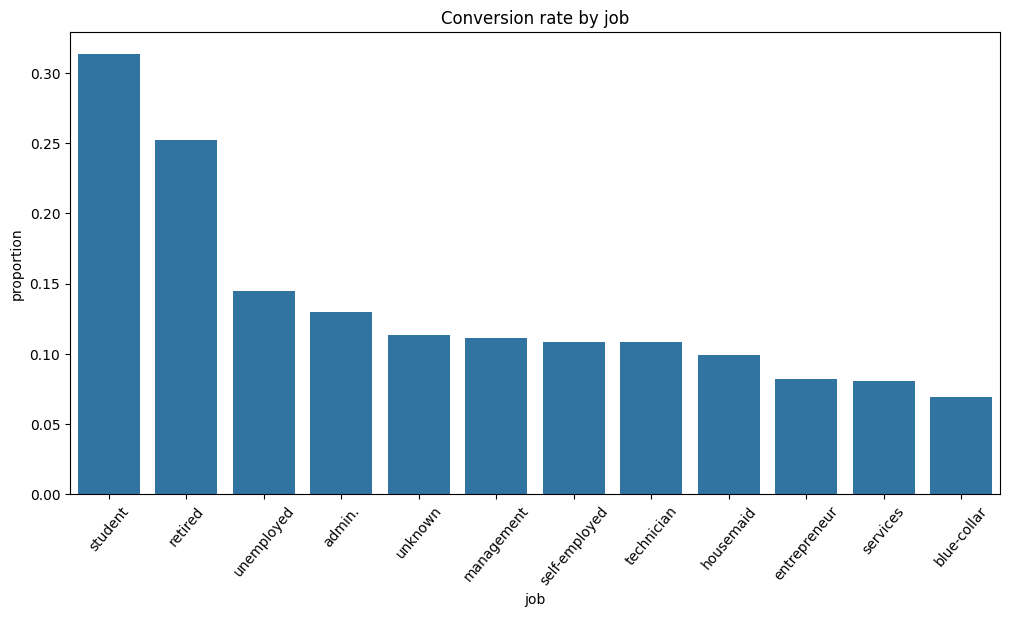

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=job_conversion_rate, x="job", y="proportion")
plt.xticks(rotation=50)
plt.title("Conversion rate by job")
plt.show()
plt.tight_layout()
plt.close()

Although students and retired clients show the highest conversion rates (31% and 25% respectively), they represent a small fraction of the dataset (2% and 4%). In contrast, administrative and blue-collar workers have lower conversion rates but represent a significantly larger portion of the population. Therefore, both efficiency (conversion rate) and population size must be considered when designing marketing strategies.

### conversion rate by marital status

In [9]:
marital_conversion = bank_df.groupby("marital")["y"].value_counts(normalize=True).reset_index()
marital_conversion_y =marital_conversion[marital_conversion["y"] == 'yes'].sort_values(by="proportion", ascending=False)
marital_conversion_y

,marital,y,proportion
7,unknown,yes,0.152941
5,SINGLE,yes,0.139417
3,MARRIED,yes,0.101858
1,DIVORCED,yes,0.101798


In [10]:
bank_df["marital"].value_counts(normalize=True)*100

marital
MARRIED     60.441617
SINGLE      28.169442
DIVORCED    11.190120
unknown      0.198821
Name: proportion, dtype: float64

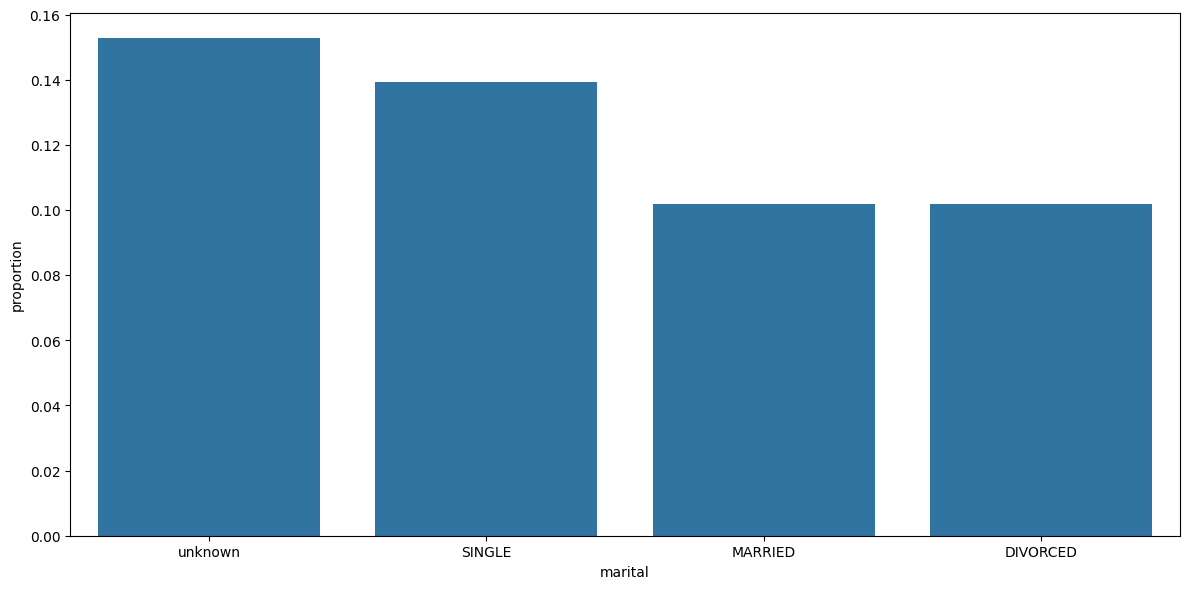

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=marital_conversion_y, x="marital", y="proportion")
plt.tight_layout()
plt.show()
plt.close()

When selecting conversion rate by marital status we find that "unknown" seems to be the one with the highest conversion but on a closer look we can see that this category only represents 0.1% so it has no significance
On the other hand, the rest of the categories are between 10 and ~14% which is not af any big significance either

### conversion rate by education

In [12]:
edu_conversion = bank_df.groupby("education")["y"].value_counts(normalize=True).reset_index()
edu_conversion_y = edu_conversion[edu_conversion["y"] == 'yes'].sort_values(by="proportion", ascending=False)
edu_conversion_y

,education,y,proportion
9,illiterate,yes,0.222222
15,unknown,yes,0.144370
13,university.degree,yes,0.136766
11,professional.course,yes,0.113787
7,high.school,yes,0.108387
1,basic.4y,yes,0.103440
3,basic.6y,yes,0.081719
5,basic.9y,yes,0.077695


In [13]:
bank_df["education"].value_counts(normalize=True)*100

education
university.degree      29.570546
high.school            23.091317
basic.9y               14.691710
professional.course    12.724551
basic.4y               10.130520
basic.6y                5.552957
unknown                 4.196295
illiterate              0.042103
Name: proportion, dtype: float64

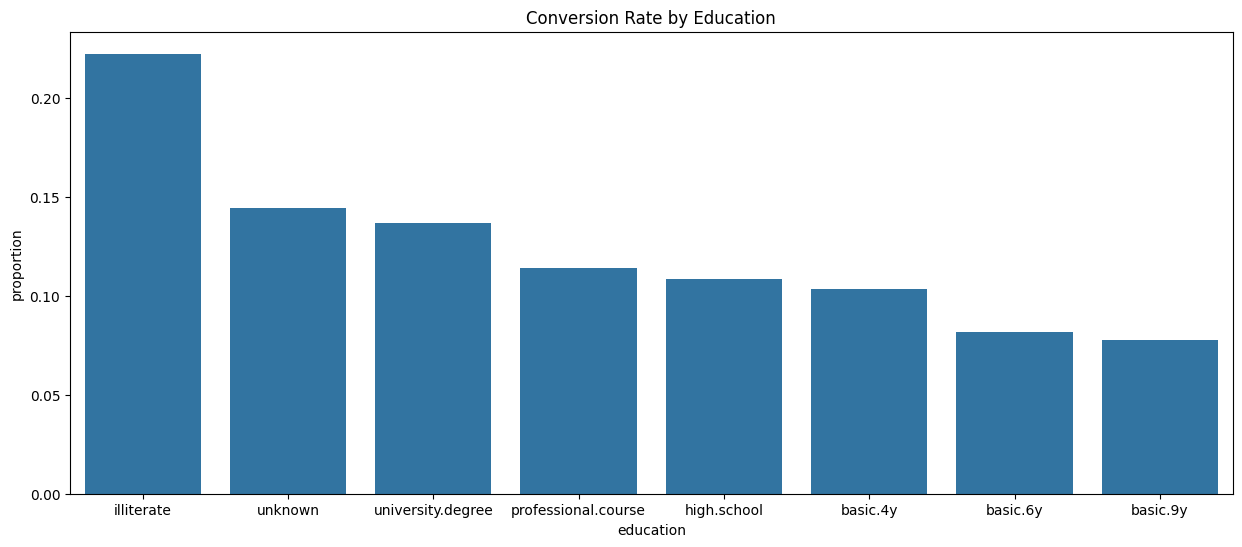

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(data=edu_conversion_y,
            x="education",
            y="proportion")
plt.tight_layout
plt.title("Conversion Rate by Education")
plt.show()
plt.close()

As with the other two sociodemographic varibales "illiterate" and "unknown" do not have a real impact on the distribution since they each represent 0.04% and 4.19% 
Categories such as "university.degree" or "professional.course" have higher conversion rate than basic education. But here the difference is not as signifficant as it appears with the "job" feature.

Differences in conversion rates across sociodemographic variables exist, yet their impact on the overall conversion rate is marginal.

# Campaign variables analysis

### - Duration

In [15]:
bank_df["duration"].describe()

count    42752.000000
mean       257.766186
std        258.778698
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [16]:
bank_df.groupby("y")["duration"].mean()

y
no     220.386205
yes    552.556017
Name: duration, dtype: float64

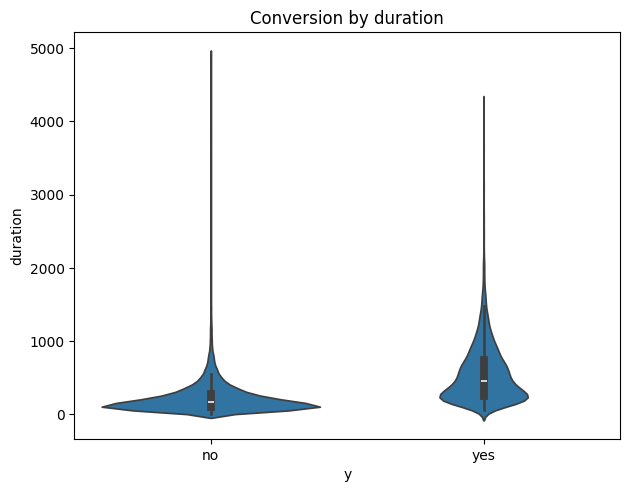

In [17]:
sns.violinplot(bank_df, x="y", y="duration")
plt.tight_layout()
plt.title("Conversion by duration")
plt.show()
plt.close()

In [18]:
bank_df.groupby("y")["duration"].median()

y
no     163.0
yes    449.0
Name: duration, dtype: float64

The duration of the interaction with the client is the one the strongest differences found so far in conversion rate. Both mean and median indicate that calls with customers who have subscribed to the products have been signifficantly longer as shown 

### - Campaign

In [19]:
bank_df.groupby("y")["campaign"].mean()

y
no     2.631797
yes    2.050509
Name: campaign, dtype: float64

In [20]:
bank_df.groupby("y")["campaign"].median()

y
no     2.0
yes    2.0
Name: campaign, dtype: float64

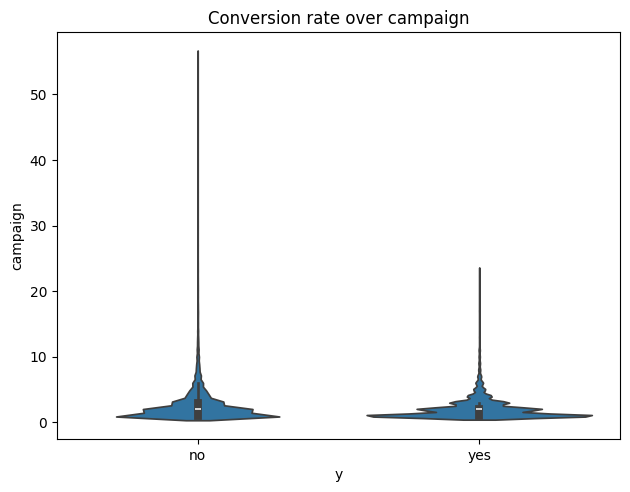

In [21]:
sns.violinplot(data=bank_df, x="y", y="campaign")
plt.tight_layout()
plt.title("Conversion rate over campaign")
plt.show()
plt.close()

### - Previous

In [22]:
bank_df.groupby("y")["previous"].mean()

y
no     0.132943
yes    0.499896
Name: previous, dtype: float64

In [23]:
bank_df["previous"].value_counts(normalize=True)

previous
0    0.862720
1    0.111246
2    0.018245
3    0.005427
4    0.001754
5    0.000468
6    0.000117
7    0.000023
Name: proportion, dtype: float64

In [24]:
bank_df.groupby("y")["previous"].median()

y
no     0.0
yes    0.0
Name: previous, dtype: float64

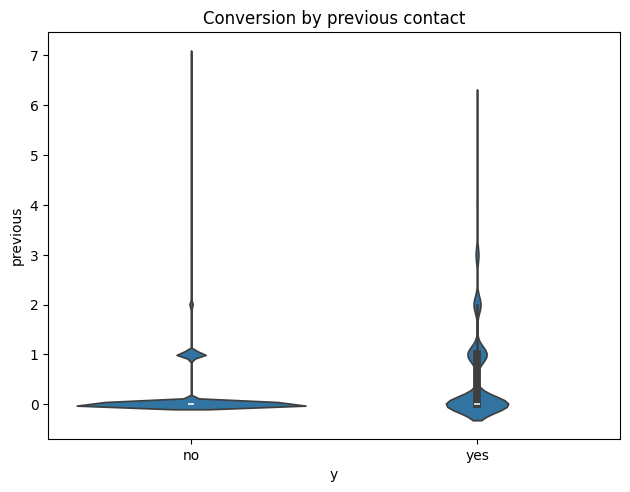

In [25]:
sns.violinplot(data=bank_df, x="y", y="previous")
plt.tight_layout()
plt.title("Conversion by previous contact")
plt.show()
plt.close()

In [26]:
bank_df["poutcome"].value_counts(normalize=True)

poutcome
NONEXISTENT    0.862720
FAILURE        0.103925
SUCCESS        0.033355
Name: proportion, dtype: float64

In [27]:
conversion_poutcome = bank_df.groupby("poutcome")["y"].value_counts(normalize=True) .reset_index()
conversion_poutcome_y = conversion_poutcome[conversion_poutcome["y"] == 'yes'].sort_values(by="proportion", ascending=False)
conversion_poutcome_y

,poutcome,y,proportion
4,SUCCESS,yes,0.654278
1,FAILURE,yes,0.142021
3,NONEXISTENT,yes,0.088035


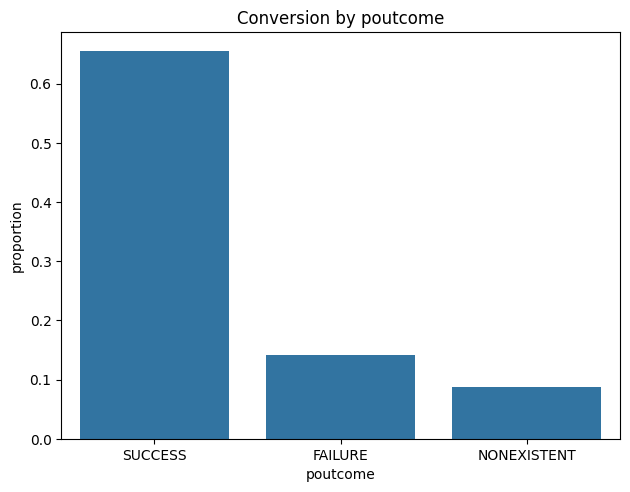

In [28]:
sns.barplot(data=conversion_poutcome_y, x="poutcome", y="proportion")
plt.tight_layout()
plt.title("Conversion by poutcome")
plt.show()
plt.close()

Customers who previously subscribed to the product show a significantly higher probability of conversion in the current campaign. This indicates that past success is a key predictor for future subscription.

In [29]:
bank_df["contact"].value_counts(normalize=True)

contact
cellular     0.636976
telephone    0.363024
Name: proportion, dtype: float64

In [30]:
bank_df.groupby("y")["contact"].value_counts(normalize=True).reset_index()

,y,contact,proportion
0,no,cellular,0.612029
1,no,telephone,0.387971
2,yes,cellular,0.833714
3,yes,telephone,0.166286


In [31]:
bank_df["contacted_before"] = bank_df["pdays"].apply(lambda x: 0 if x == 999 else 1)

In [32]:
bank_df.groupby("contacted_before")["y"].value_counts(normalize=True).reset_index()

,contacted_before,y,proportion
0,0,no,0.907711
1,0,yes,0.092289
2,1,yes,0.641091
3,1,no,0.358909


Customers contacted in prior campaigns have much higher conversion rate

In [33]:
bank_df["id_"].duplicated().sum()

np.int64(0)

In [34]:
len(bank_df)

42752

In [36]:
bank_df["id_"].nunique()

42752